<a href="https://www.kaggle.com/code/prathameshpahilwan/task-2?scriptVersionId=128994726" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-file/tested.csv


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

df = pd.read_csv('/kaggle/input/test-file/tested.csv')
df.sample(5)

print(df.shape)


df = df.dropna()



sex = df['Sex'].value_counts()
age = df['Age'].value_counts()



df['is_male'] = [1 if typ == 'male' else 0 for typ in df['Sex']]
df.drop('Sex', axis=1, inplace=True)



df['is_young'] = [1 if quality >= 35 else 0 for quality in df['Age']]
df.drop('Age', axis=1, inplace=True)



df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

X = df.drop('is_young', axis=1)
y = df['is_young']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3, random_state=42
)


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled[:3])


tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train_scaled, y_train, epochs=100)
print(history)

(418, 12)
[[-0.24924437 -1.03390789 -0.28318969  0.68599434  0.42008403 -0.1019644
   1.03390789]
 [-0.57819634 -1.03390789 -0.28318969  0.68599434  2.52050415  2.33963073
   1.03390789]
 [-0.37576436 -1.03390789 -0.28318969 -1.02899151 -0.63012604 -0.54694861
   1.03390789]]
Epoch 1/100
2/2 [==============================] - 2s 18ms/step - loss: 0.7025 - accuracy: 0.5000 - precision: 0.7727 - recall: 0.4048   
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 0.6243 - accuracy: 0.7167 - precision: 0.7119 - recall: 1.0000
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 0.5778 - accuracy: 0.7333 - precision: 0.7241 - recall: 1.0000
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 0.5538 - accuracy: 0.7667 - precision: 0.7500 - recall: 1.0000
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 0.5262 - accuracy: 0.7667 - precision: 0.7500 - recall: 1.0000
Epoch 6/100
2/2 [==============================]

Plotting accuracy versus epoch
The accuracy of the model is:
1.0


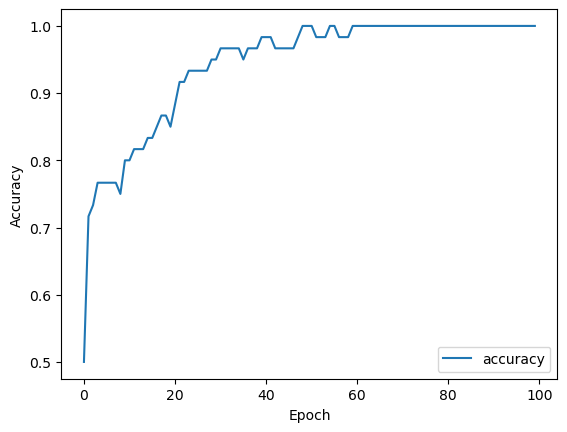

In [3]:
print("Plotting accuracy versus epoch")
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
print("The accuracy of the model is:")
print(np.max(history.history['accuracy']))